## QUIZ 1 (Zixuan Li)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

df = pd.read_csv(url, names=column_names)
print("Number of samples: %d" % len(df))
df.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Write a code that shows how many unique values are in the 'sex' column?

In [3]:
df.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

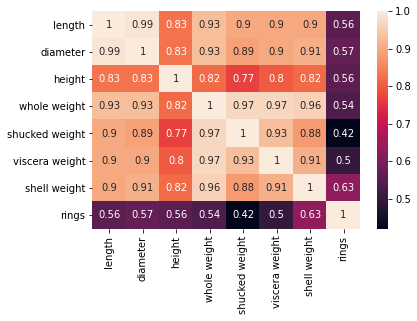

In [4]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Assume that we want to estimate weigth of a sample through linear regression, based on the correlation matrix suggest two predictors.

Based on the correlation matrix, I suggest to use shucked weight and viscera weight as predictors to predict the weight of a sample, because these two variables have the highest correlation coefficient, which may generate more accurate prediction through linear regression.

In [5]:
X = df[['length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings']] #predictors


y = df['sex'] #target

In [6]:
#the test set will be 30% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Why we break our dataset into test and train?

We break our dataset into test and training dataset to assess the performance of our model. If the accuracy of training dataset is very high, but that of test dataset is quite low, our model could be overfitting. If we don't make the split, and use only one dataset to both train and test the model, we are not able to identify overfitting problem, which is very common.

Explain logistic regression algorithm?

Logistic regression algorithm is used to make categorical predictions. For example, we can use logistic regression to predict if a customer make a purchase or not, based on his/her characteristics and past behavior.

In [7]:
#Build the Logistic regression object
logisticRegr = LogisticRegression(solver='liblinear',fit_intercept=True)
#use logistic model to fit training data
logisticRegr.fit(X_train, y_train)
#generate predicted classes for test data
logis_pred = logisticRegr.predict(X_test)
#generate predicted probabilites for test data
logis_pred_prob = logisticRegr.predict_proba(X_test)

In [8]:
#Build a "dummy" classifier that predicts every observation to be the most frequent class, in this case 'no-exit')
dummy = DummyClassifier(strategy= 'most_frequent')
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)

In [9]:
print("Test accuracy (Logistic Regression) =", logisticRegr.score(X_test,y_test), end="\n\n")

print("Test accuracy (Dummy Classifier) =", dumb.score(dumb_pred,y_test))

Test accuracy (Logistic Regression) = 0.5685805422647527

Test accuracy (Dummy Classifier) = 0.3652312599681021


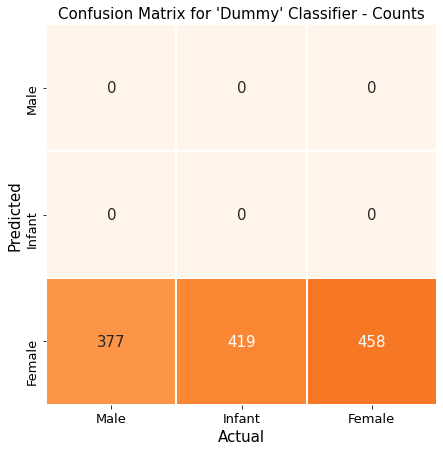

In [10]:
#generate confusion matrix for Dummy classifier
cm_dummy = confusion_matrix(y_test, dumb_pred)
#put it into a dataframe for seaborn plot function
cm_dummy_df = pd.DataFrame(cm_dummy)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Male","Infant", 'Female'], yticklabels=["Male","Infant", 'Female'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Male","Infant", 'Female'], fontsize=13)
ax.set_yticklabels(["Male","Infant", 'Female'], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)

plt.show()

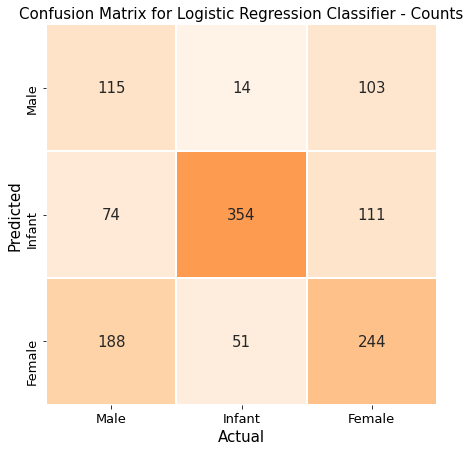

In [11]:
#generate confusion matrix for Logistic Regression classifier
cm_logis = confusion_matrix(y_test, logis_pred)
#put it into a dataframe for seaborn plot function
cm_logis_df = pd.DataFrame(cm_logis)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_logis_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Male","Infant", 'Female'], yticklabels=["Male","Infant", 'Female'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Male","Infant", 'Female'], fontsize=13)
ax.set_yticklabels(["Male","Infant", 'Female'], fontsize=13)
plt.title("Confusion Matrix for Logistic Regression Classifier - Counts", fontsize=15)

plt.show()

Assume that we are interested in predicting Infants, what is the value of the following parameters (use the Confusion Matrix for Logstic Regression Classifier):

True Postive: 354

True Negative: 115 + 244 = 359

Recall: (True Positive) / (True Positive + False Negative) = 354 / (354 + 74 + 111) = 65.68%

Why do we make a distinction between type 1 and type 2 errors? Use an example to convey your point.

What is the difference between clustering and classification?

Type 1 error is False Positive, and Type 2 error is False Negative. We make distinction between them because the cost of making different errors are different. For example, a company is predicting whether a customer will purchase their product after receiving a promotion. If the company made a type 1 error and predict a certain customer will buy, but the customer didn't, the company wasted its promotional cost. However, if the company made a type 2 error and predict a certain customer won't buy, but the customer would. It will lose a potential customer by not sending the promotion.